In [3]:
import os
import pickle
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.markers import MarkerStyle

plt.style.use('default')
plt.rcParams.update({"text.usetex": True,
    "font.family": "sans-serif",
    "axes.formatter.use_mathtext": True,
    "axes.formatter.limits": (-3, 3)
})

%matplotlib inline

In [4]:
waveform_metadata_a = pickle.load(open('../../output/match_variations/match_mchirp_time_snr/injections/GW Waveform A Meta Data.pkl', 'rb'))   # Importing Waveform Meta Data
mchirp_a, q_a = waveform_metadata_a['H1']['parameters']['chirp_mass'], waveform_metadata_a['H1']['parameters']['mass_ratio']
mass_1_a, mass_2_a = mchirp_a*np.power(1+q_a,1/5)/np.power(q_a,3/5), mchirp_a*np.power(1+q_a,1/5)*np.power(q_a,2/5)
eta_a = (mass_1_a*mass_2_a)/np.power(mass_1_a+mass_2_a, 2)
luminosity_distance_a = waveform_metadata_a['H1']['parameters']['luminosity_distance']
snr_a = np.abs(waveform_metadata_a['H1']['optimal_SNR'])

N_sampl = 125
waveform_metadata_b = []
mass_1_b, mass_2_b, mchirp_b, eta_b, q_b, luminosity_distance_b, snr_b, delta_tc = np.zeros(N_sampl), np.zeros(N_sampl), np.zeros(N_sampl), np.zeros(N_sampl), np.zeros(N_sampl), np.zeros(N_sampl), np.zeros(N_sampl), np.zeros(N_sampl)
for k in range(N_sampl):
    waveform_metadata_b.append(pickle.load(open('../../output/match_variations/match_mchirp_time_snr/injections/GW Waveform B Meta Data %s.pkl'%(k+1), 'rb')))   # Importing Waveform Meta Data
    mchirp_b[k], q_b[k] = waveform_metadata_b[k]['H1']['parameters']['chirp_mass'], waveform_metadata_b[k]['H1']['parameters']['mass_ratio']
    mass_1_b[k], mass_2_b[k] = mchirp_b[k]*np.power(1+q_b[k],1/5)/np.power(q_b[k],3/5), mchirp_b[k]*np.power(1+q_b[k],1/5)*np.power(q_b[k],2/5)
    eta_b[k] = (mass_1_b[k]*mass_2_b[k])/np.power(mass_1_b[k]+mass_2_b[k], 2)
    luminosity_distance_b[k], snr_b[k] = waveform_metadata_b[k]['H1']['parameters']['luminosity_distance'], np.abs(waveform_metadata_b[k]['H1']['optimal_SNR'])
    delta_tc[k] = waveform_metadata_b[k]['H1']['parameters']['geocent_time']-waveform_metadata_a['H1']['parameters']['geocent_time']

data = np.loadtxt('../../output/match_variations/match_mchirp_time_snr/outputs/output.csv', delimiter=',')
match_f_snr, mchirpf_snr, etaf_snr, luminosity_distancef_snr = data[:, 0], data[:, 1], data[:, 2], data[:, 3]
match_f_snr = np.nan_to_num(match_f_snr, nan=1.0)

#### Recovered Chirp Mass $\mathcal{M}$

In [5]:
bias_mchirp = np.abs(mchirpf_snr-mchirp_a)/mchirp_a*100
bias_mchirp_b = np.abs(mchirpf_snr-mchirp_b)/mchirp_b*100

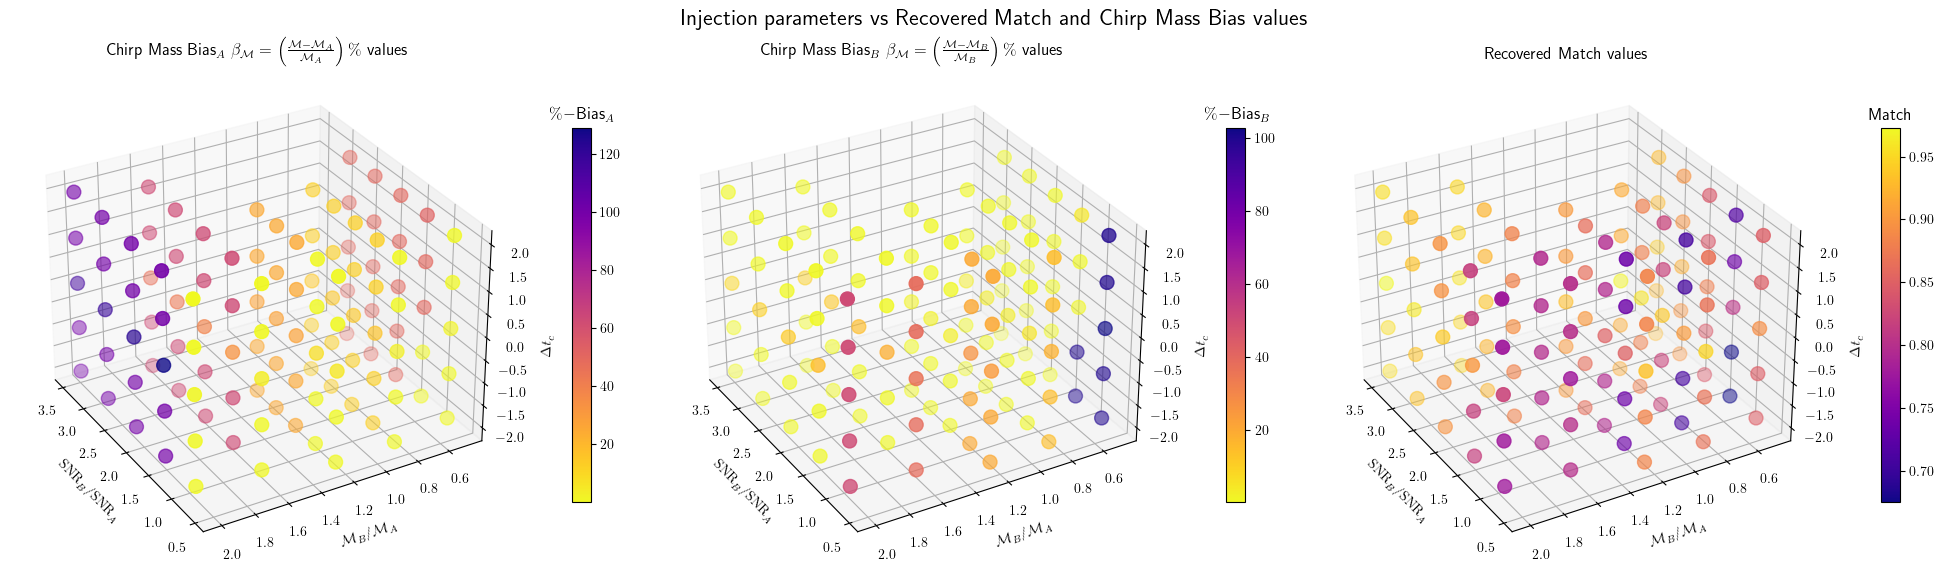

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), subplot_kw={'projection': '3d'})

scatter1 = axes[0].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=bias_mchirp, edgecolor=None, cmap='plasma_r', s=100)
clb1 = fig.colorbar(scatter1, ax=axes[0], shrink=0.7, pad=0.1)
clb1.ax.set_title('$\\%-$Bias$_A$')

axes[0].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[0].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[0].set_zlabel('$\Delta t_c$')
axes[0].set_title('Chirp Mass Bias$_A$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_A}{\\mathcal{M}_A}\\right)\\%$ values', loc='center')
axes[0].ticklabel_format(useOffset=False, style='plain')
axes[0].azim = 150

scatter2 = axes[1].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=bias_mchirp_b, edgecolor=None, cmap='plasma_r', s=100)
clb2 = fig.colorbar(scatter2, ax=axes[1], shrink=0.7, pad=0.1)
clb2.ax.set_title('$\\%-$Bias$_B$')

axes[1].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[1].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[1].set_zlabel('$\Delta t_c$')
axes[1].set_title('Chirp Mass Bias$_B$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_B}{\\mathcal{M}_B}\\right)\\%$ values', loc='center')
axes[1].ticklabel_format(useOffset=False, style='plain')
axes[1].azim = 150

scatter3 = axes[2].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=match_f_snr, edgecolor=None, cmap='plasma', s=100)
clb3 = fig.colorbar(scatter3, ax=axes[2], shrink=0.7, pad=0.1)
clb3.ax.set_title('Match')

axes[2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[2].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[2].set_zlabel('$\Delta t_c$')
axes[2].set_title('Recovered Match values', loc='center')
axes[2].ticklabel_format(useOffset=False, style='plain')
axes[2].azim = 150

fig.suptitle('Injection parameters vs Recovered Match and Chirp Mass Bias values', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../../output/match_variations/match_mchirp_time_snr/BIAS_MCHIRP(3D).png')
plt.show()

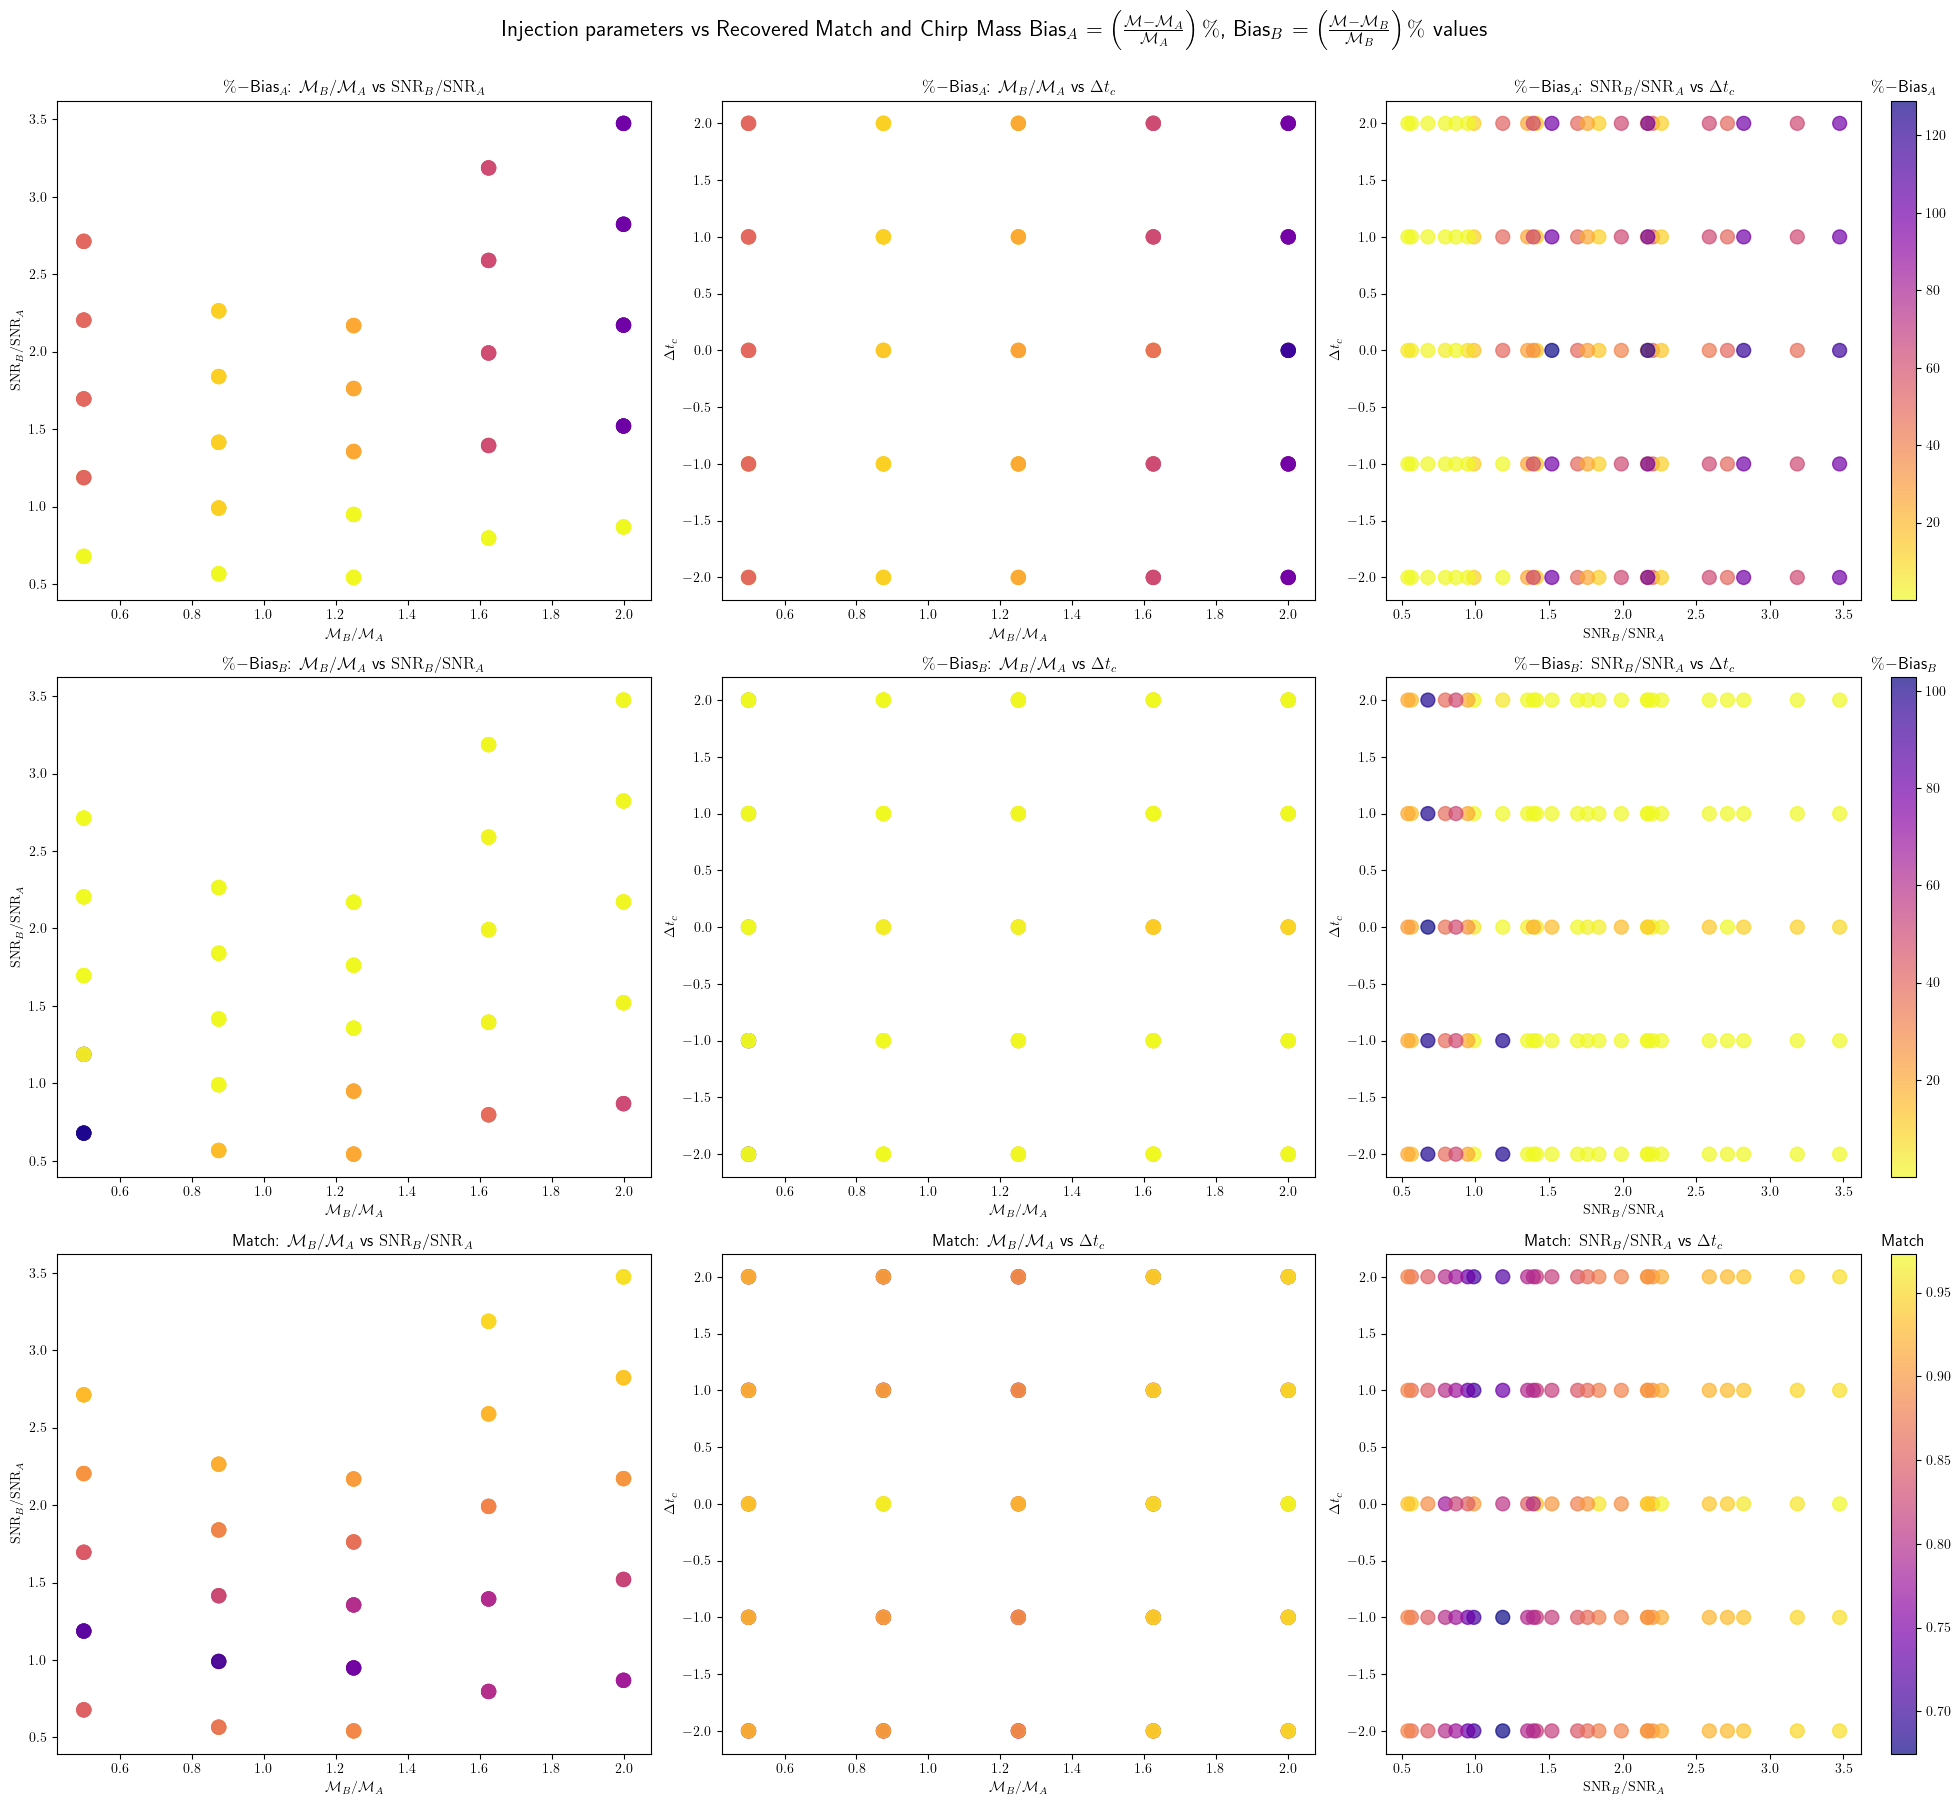

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(20, 18))

scatter11 = axes[0,0].scatter(mchirp_b/mchirp_a, snr_b/snr_a, c=bias_mchirp, cmap='plasma_r',s=100, alpha=0.7)
axes[0,0].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[0,0].set_ylabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[0,0].set_title('$\\%-$Bias$_A$: $\mathcal{M}_B/\mathcal{M}_A$ vs $\mathrm{SNR}_B/\mathrm{SNR}_A$')

scatter12 = axes[1,0].scatter(mchirp_b/mchirp_a, snr_b/snr_a, c=bias_mchirp_b, cmap='plasma_r', s=100, alpha=0.7)
axes[1,0].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[1,0].set_ylabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[1,0].set_title('$\\%-$Bias$_B$: $\mathcal{M}_B/\mathcal{M}_A$ vs $\mathrm{SNR}_B/\mathrm{SNR}_A$')

scatter13 = axes[2,0].scatter(mchirp_b/mchirp_a, snr_b/snr_a, c=match_f_snr, cmap='plasma', s=100, alpha=0.7)
axes[2,0].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[2,0].set_ylabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[2,0].set_title('Match: $\mathcal{M}_B/\mathcal{M}_A$ vs $\mathrm{SNR}_B/\mathrm{SNR}_A$')

scatter21 = axes[0,1].scatter(mchirp_b/mchirp_a, delta_tc, c=bias_mchirp, cmap='plasma_r', s=100, alpha=0.7)
axes[0,1].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[0,1].set_ylabel('$\Delta t_c$')
axes[0,1].set_title('$\\%-$Bias$_A$: $\mathcal{M}_B/\mathcal{M}_A$ vs $\Delta t_c$')

scatter22 = axes[1,1].scatter(mchirp_b/mchirp_a, delta_tc, c=bias_mchirp_b, cmap='plasma_r', s=100, alpha=0.7)
axes[1,1].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[1,1].set_ylabel('$\Delta t_c$')
axes[1,1].set_title('$\\%-$Bias$_B$: $\mathcal{M}_B/\mathcal{M}_A$ vs $\Delta t_c$')

scatter32 = axes[2,1].scatter(mchirp_b/mchirp_a, delta_tc, c=match_f_snr, cmap='plasma', s=100, alpha=0.7)
axes[2,1].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[2,1].set_ylabel('$\Delta t_c$')
axes[2,1].set_title('Match: $\mathcal{M}_B/\mathcal{M}_A$ vs $\Delta t_c$')

scatter31 = axes[0,2].scatter(snr_b/snr_a, delta_tc, c=bias_mchirp, cmap='plasma_r', s=100, alpha=0.7)
clb5 = plt.colorbar(scatter31)
clb5.ax.set_title('$\\%-$Bias$_A$')
axes[0,2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[0,2].set_ylabel('$\Delta t_c$')
axes[0,2].set_title('$\\%-$Bias$_A$: $\mathrm{SNR}_B/\mathrm{SNR}_A$ vs $\Delta t_c$')

scatter32 = axes[1,2].scatter(snr_b/snr_a, delta_tc, c=bias_mchirp_b, cmap='plasma_r', s=100, alpha=0.7)
clb6 = plt.colorbar(scatter32)
clb6.ax.set_title('$\\%-$Bias$_B$')
axes[1,2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[1,2].set_ylabel('$\Delta t_c$')
axes[1,2].set_title('$\\%-$Bias$_B$: $\mathrm{SNR}_B/\mathrm{SNR}_A$ vs $\Delta t_c$')

scatter33 = axes[2,2].scatter(snr_b/snr_a, delta_tc, c=match_f_snr, cmap='plasma', s=100, alpha=0.7)
clb7 = plt.colorbar(scatter33)
clb7.ax.set_title('Match')
axes[2,2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[2,2].set_ylabel('$\Delta t_c$')
axes[2,2].set_title('Match: $\mathrm{SNR}_B/\mathrm{SNR}_A$ vs $\Delta t_c$')

fig.suptitle('Injection parameters vs Recovered Match and Chirp Mass Bias$_A$ $=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_A}{\\mathcal{M}_A}\\right)\\%$, Bias$_B$ $=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_B}{\\mathcal{M}_B}\\right)\\%$ values', fontsize=16, fontweight='bold', y=1)
plt.tight_layout()
plt.savefig('../../output/match_variations/match_mchirp_time_snr/BIAS_MCHIRP(2D).png')
plt.show()

#### Recovered Symm Mass Ratio $\eta$

In [8]:
bias_eta = np.abs(etaf_snr-eta_a)/eta_a*100
bias_eta_b = np.abs(etaf_snr-eta_b)/eta_b*100

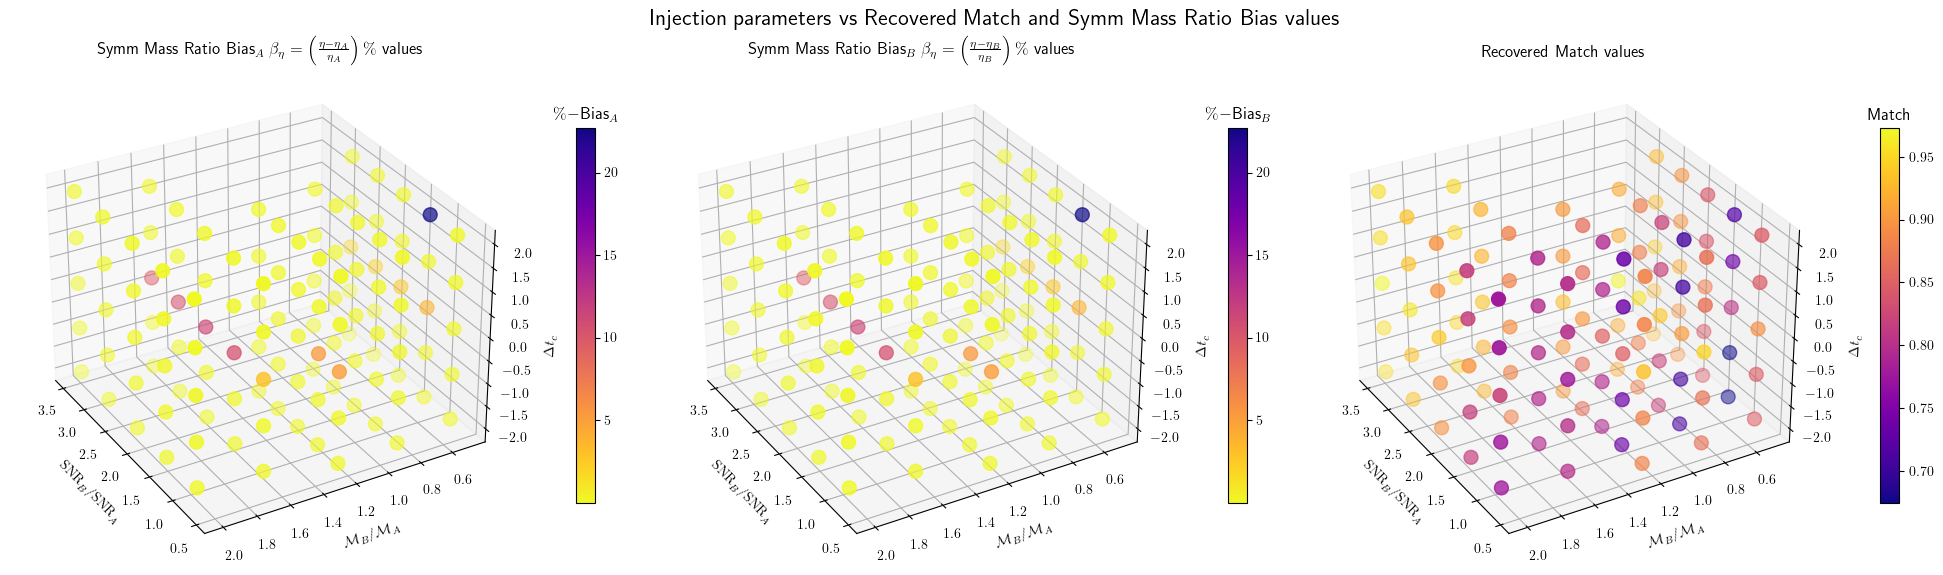

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), subplot_kw={'projection': '3d'})

scatter1 = axes[0].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=bias_eta, cmap='plasma_r', s=100)
clb1 = plt.colorbar(scatter1, ax=axes[0], shrink=0.7, pad=0.1)
clb1.ax.set_title('$\\%-$Bias$_A$')

axes[0].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[0].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[0].set_zlabel('$\Delta t_c$')
axes[0].set_title('Symm Mass Ratio Bias$_A$ $\\beta_{\\eta}=\\left(\\frac{\\eta-\\eta_A}{\\eta_A}\\right)\\%$ values', loc='center')
axes[0].ticklabel_format(useOffset=False, style='plain')
axes[0].azim = 150

scatter2  = axes[1].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=bias_eta_b, cmap='plasma_r', s=100)
clb1 = plt.colorbar(scatter2, ax=axes[1], shrink=0.7, pad=0.1)
clb1.ax.set_title('$\\%-$Bias$_B$')

axes[1].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[1].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[1].set_zlabel('$\Delta t_c$')
axes[1].set_title('Symm Mass Ratio Bias$_B$ $\\beta_{\\eta}=\\left(\\frac{\\eta-\\eta_B}{\\eta_B}\\right)\\%$ values', loc='center')
axes[1].ticklabel_format(useOffset=False, style='plain')
axes[1].azim = 150

scatter3 = axes[2].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=match_f_snr, cmap='plasma', s=100)
clb2 = plt.colorbar(scatter3, ax=axes[2], shrink=0.7, pad=0.1)
clb2.ax.set_title('Match')

axes[2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[2].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[2].set_zlabel('$\Delta t_c$')
axes[2].set_title('Recovered Match values', loc='center')
axes[2].ticklabel_format(useOffset=False, style='plain')
axes[2].azim = 150

plt.suptitle('Injection parameters vs Recovered Match and Symm Mass Ratio Bias values', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../../output/match_variations/match_mchirp_time_snr/BIAS_SYMMMASSRATIO(3D).png')
plt.show()

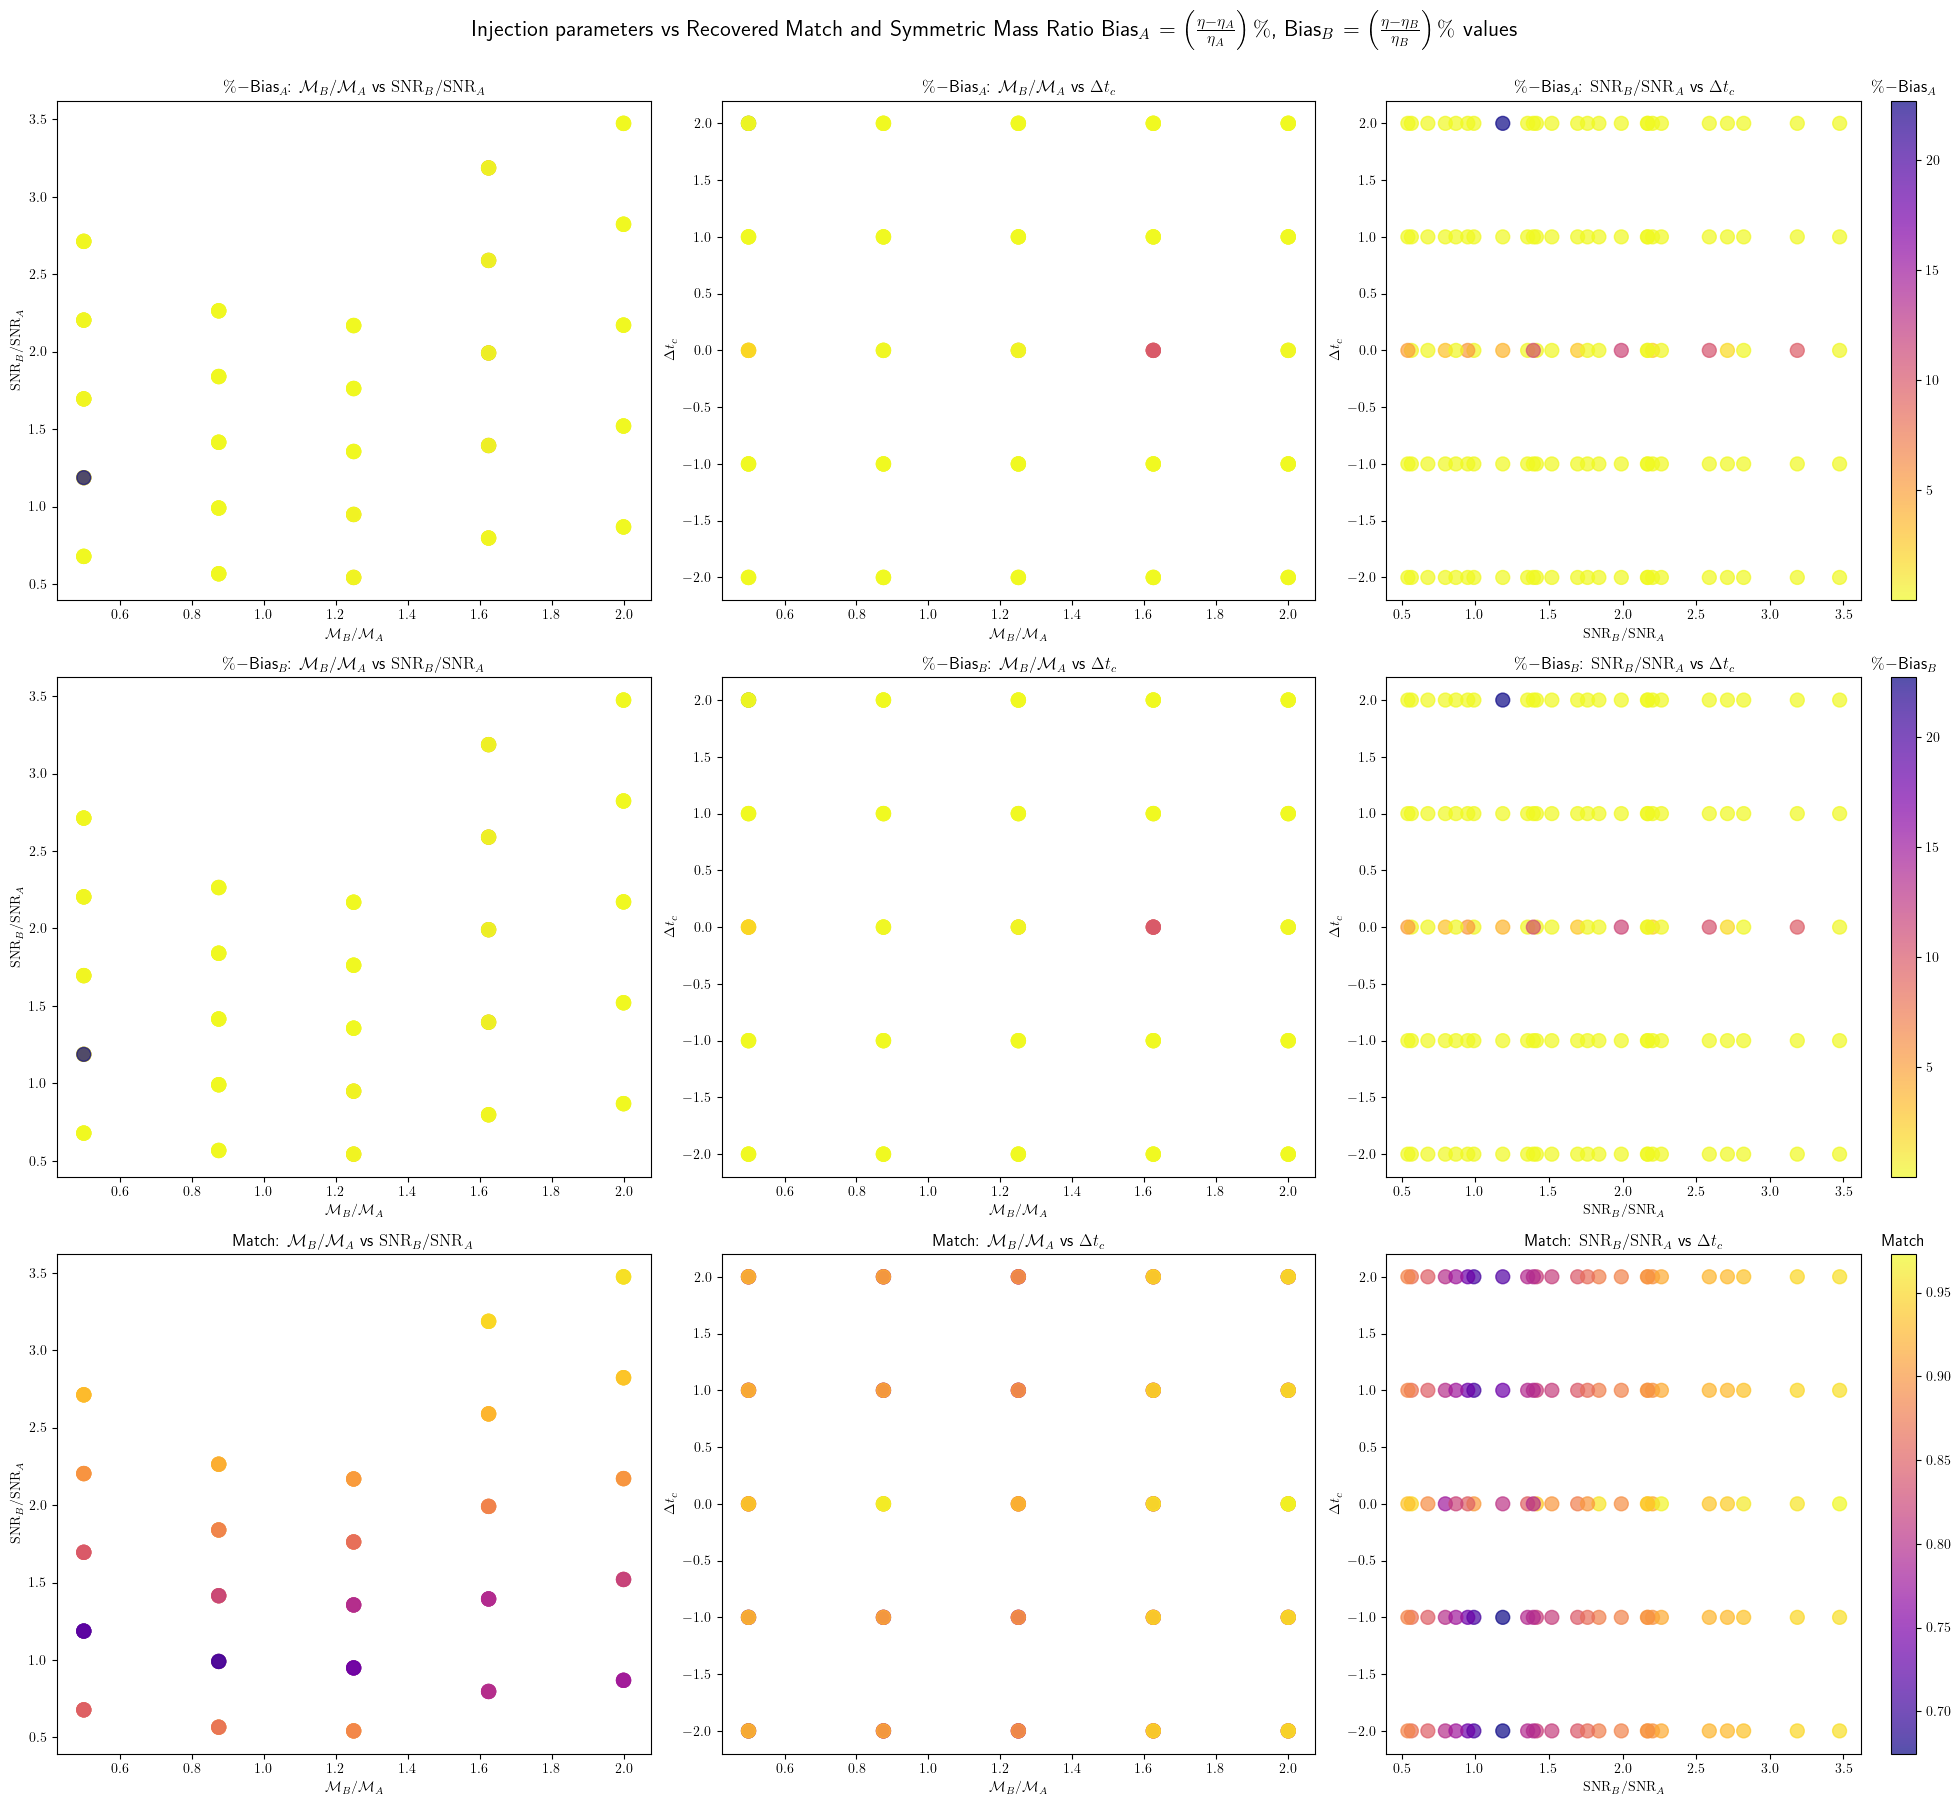

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(20, 18))

scatter11 = axes[0,0].scatter(mchirp_b/mchirp_a, snr_b/snr_a, c=bias_eta, cmap='plasma_r',s=100, alpha=0.7)
axes[0,0].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[0,0].set_ylabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[0,0].set_title('$\\%-$Bias$_A$: $\mathcal{M}_B/\mathcal{M}_A$ vs $\mathrm{SNR}_B/\mathrm{SNR}_A$')

scatter12 = axes[1,0].scatter(mchirp_b/mchirp_a, snr_b/snr_a, c=bias_eta_b, cmap='plasma_r', s=100, alpha=0.7)
axes[1,0].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[1,0].set_ylabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[1,0].set_title('$\\%-$Bias$_B$: $\mathcal{M}_B/\mathcal{M}_A$ vs $\mathrm{SNR}_B/\mathrm{SNR}_A$')

scatter13 = axes[2,0].scatter(mchirp_b/mchirp_a, snr_b/snr_a, c=match_f_snr, cmap='plasma', s=100, alpha=0.7)
axes[2,0].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[2,0].set_ylabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[2,0].set_title('Match: $\mathcal{M}_B/\mathcal{M}_A$ vs $\mathrm{SNR}_B/\mathrm{SNR}_A$')

scatter21 = axes[0,1].scatter(mchirp_b/mchirp_a, delta_tc, c=bias_eta, cmap='plasma_r', s=100, alpha=0.7)
axes[0,1].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[0,1].set_ylabel('$\Delta t_c$')
axes[0,1].set_title('$\\%-$Bias$_A$: $\mathcal{M}_B/\mathcal{M}_A$ vs $\Delta t_c$')

scatter22 = axes[1,1].scatter(mchirp_b/mchirp_a, delta_tc, c=bias_eta_b, cmap='plasma_r', s=100, alpha=0.7)
axes[1,1].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[1,1].set_ylabel('$\Delta t_c$')
axes[1,1].set_title('$\\%-$Bias$_B$: $\mathcal{M}_B/\mathcal{M}_A$ vs $\Delta t_c$')

scatter32 = axes[2,1].scatter(mchirp_b/mchirp_a, delta_tc, c=match_f_snr, cmap='plasma', s=100, alpha=0.7)
axes[2,1].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[2,1].set_ylabel('$\Delta t_c$')
axes[2,1].set_title('Match: $\mathcal{M}_B/\mathcal{M}_A$ vs $\Delta t_c$')

scatter31 = axes[0,2].scatter(snr_b/snr_a, delta_tc, c=bias_eta, cmap='plasma_r', s=100, alpha=0.7)
clb5 = plt.colorbar(scatter31)
clb5.ax.set_title('$\\%-$Bias$_A$')
axes[0,2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[0,2].set_ylabel('$\Delta t_c$')
axes[0,2].set_title('$\\%-$Bias$_A$: $\mathrm{SNR}_B/\mathrm{SNR}_A$ vs $\Delta t_c$')

scatter32 = axes[1,2].scatter(snr_b/snr_a, delta_tc, c=bias_eta_b, cmap='plasma_r', s=100, alpha=0.7)
clb6 = plt.colorbar(scatter32)
clb6.ax.set_title('$\\%-$Bias$_B$')
axes[1,2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[1,2].set_ylabel('$\Delta t_c$')
axes[1,2].set_title('$\\%-$Bias$_B$: $\mathrm{SNR}_B/\mathrm{SNR}_A$ vs $\Delta t_c$')

scatter33 = axes[2,2].scatter(snr_b/snr_a, delta_tc, c=match_f_snr, cmap='plasma', s=100, alpha=0.7)
clb7 = plt.colorbar(scatter33)
clb7.ax.set_title('Match')
axes[2,2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[2,2].set_ylabel('$\Delta t_c$')
axes[2,2].set_title('Match: $\mathrm{SNR}_B/\mathrm{SNR}_A$ vs $\Delta t_c$')

fig.suptitle('Injection parameters vs Recovered Match and Symmetric Mass Ratio Bias$_A$ $=\\left(\\frac{\\eta-\\eta_A}{\\eta_A}\\right)\\%$, Bias$_B$ $=\\left(\\frac{\\eta-\\eta_B}{\\eta_B}\\right)\\%$ values', fontsize=16, fontweight='bold', y=1)
plt.tight_layout()
plt.savefig('../../output/match_variations/match_mchirp_time_snr/BIAS_SYMMMASSRATIO(2D).png')
plt.show()

### Aliter

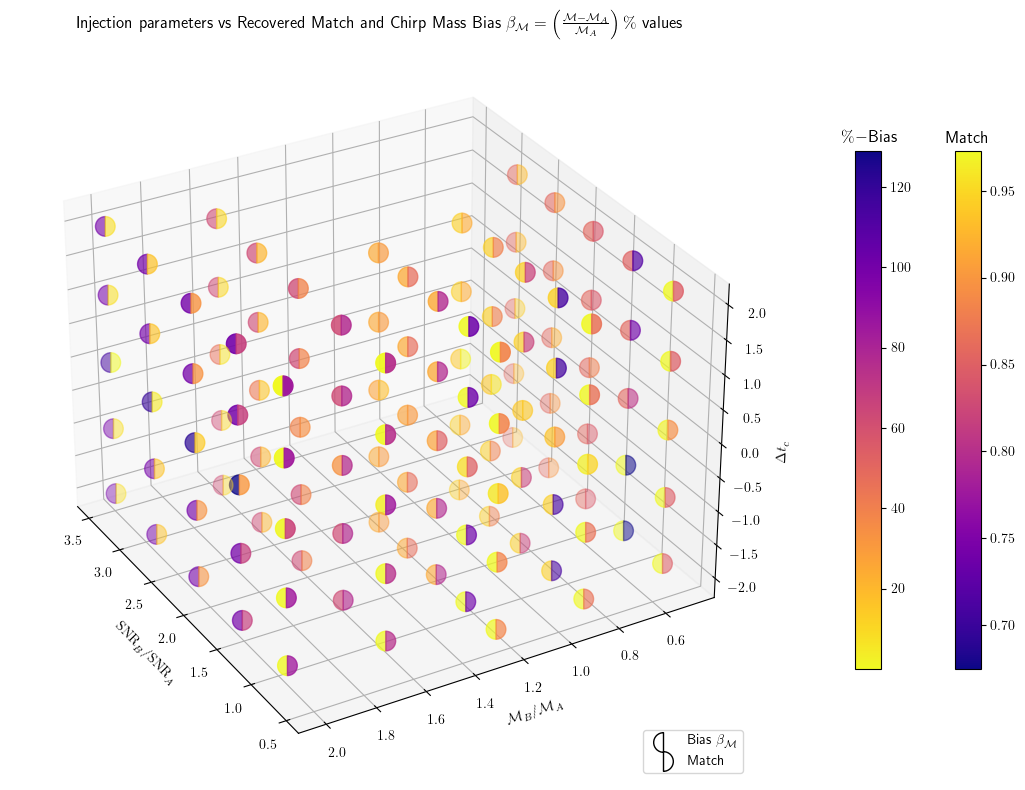

In [11]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax1 = ax.scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=bias_mchirp, cmap='plasma_r', s=200, marker=MarkerStyle("o", fillstyle="left"))
ax2 = ax.scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=match_f_snr, cmap='plasma', s=200, marker=MarkerStyle("o", fillstyle="right"))

clb2 = plt.colorbar(ax2, ax=ax, shrink=0.7, norm=None, pad=-0.05)
clb2.ax.set_title('Match')

clb1 = plt.colorbar(ax1, ax=ax, shrink=0.7, norm=None, pad=0.1)
clb1.ax.set_title('$\\%-$Bias')

key_handles = [
    ax.scatter([], [], [], c='white', edgecolor='black', marker=MarkerStyle("o", fillstyle="left"), s=200),
    ax.scatter([], [], [], c='white', edgecolor='black', marker=MarkerStyle("o", fillstyle="right"), s=200)
]
key_labels = ['Bias $\\beta_{\\mathcal{M}}$', 'Match']
ax.legend(key_handles, key_labels, loc='lower right')

ax.set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
ax.set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
ax.set_zlabel('$\Delta t_c$')
ax.set_title('Injection parameters vs Recovered Match and Chirp Mass Bias $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_A}{\\mathcal{M}_A}\\right)\\%$ values', loc='center')
ax.ticklabel_format(useOffset=False, style='plain')
ax.azim = 150

plt.tight_layout()
plt.show()

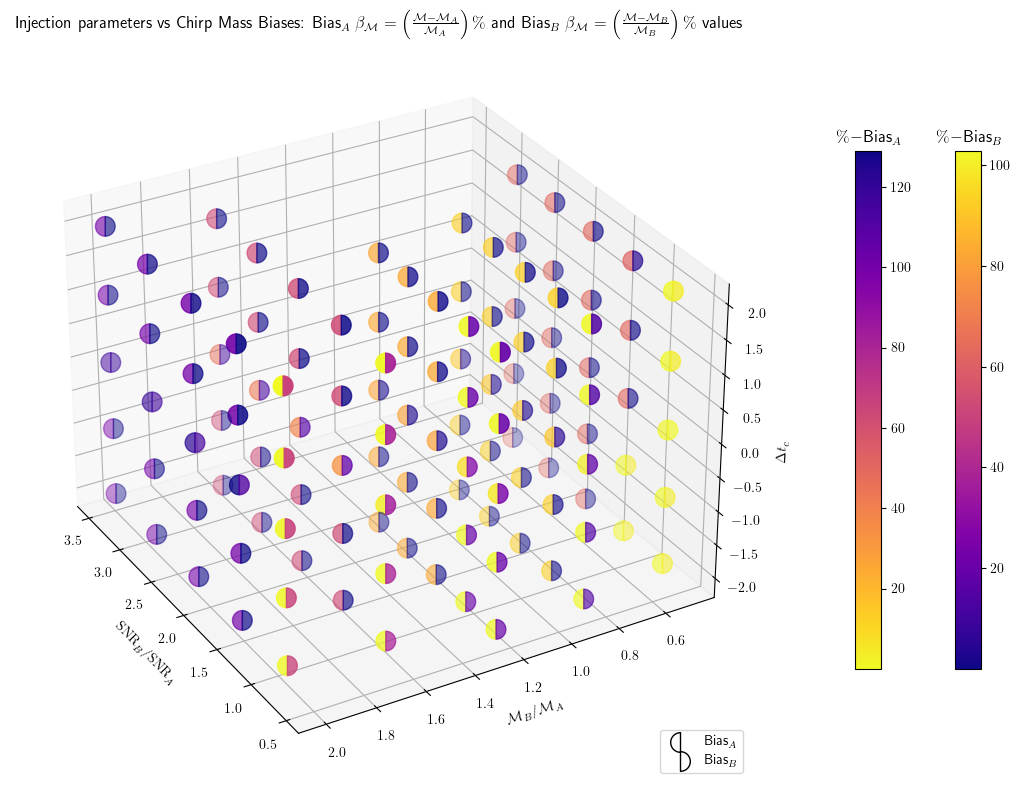

In [12]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax1 = ax.scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=bias_mchirp, cmap='plasma_r', s=200, marker=MarkerStyle("o", fillstyle="left"))
ax2 = ax.scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=bias_mchirp_b, cmap='plasma', s=200, marker=MarkerStyle("o", fillstyle="right"))

clb2 = plt.colorbar(ax2, ax=ax, shrink=0.7, norm=None, pad=-0.05)
clb2.ax.set_title('$\\%-$Bias$_B$')

clb1 = plt.colorbar(ax1, ax=ax, shrink=0.7, norm=None, pad=0.1)
clb1.ax.set_title('$\\%-$Bias$_A$')

key_handles = [
    ax.scatter([], [], [], c='white', edgecolor='black', marker=MarkerStyle("o", fillstyle="left"), s=200),
    ax.scatter([], [], [], c='white', edgecolor='black', marker=MarkerStyle("o", fillstyle="right"), s=200)
]
key_labels = ['Bias$_A$', 'Bias$_B$']
ax.legend(key_handles, key_labels, loc='lower right')

ax.set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
ax.set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
ax.set_zlabel('$\Delta t_c$')
ax.set_title('Injection parameters vs Chirp Mass Biases: Bias$_A$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_A}{\\mathcal{M}_A}\\right)\\%$ and Bias$_B$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_B}{\\mathcal{M}_B}\\right)\\%$ values', loc='center')
ax.ticklabel_format(useOffset=False, style='plain')
ax.azim = 150

plt.tight_layout()
plt.show()

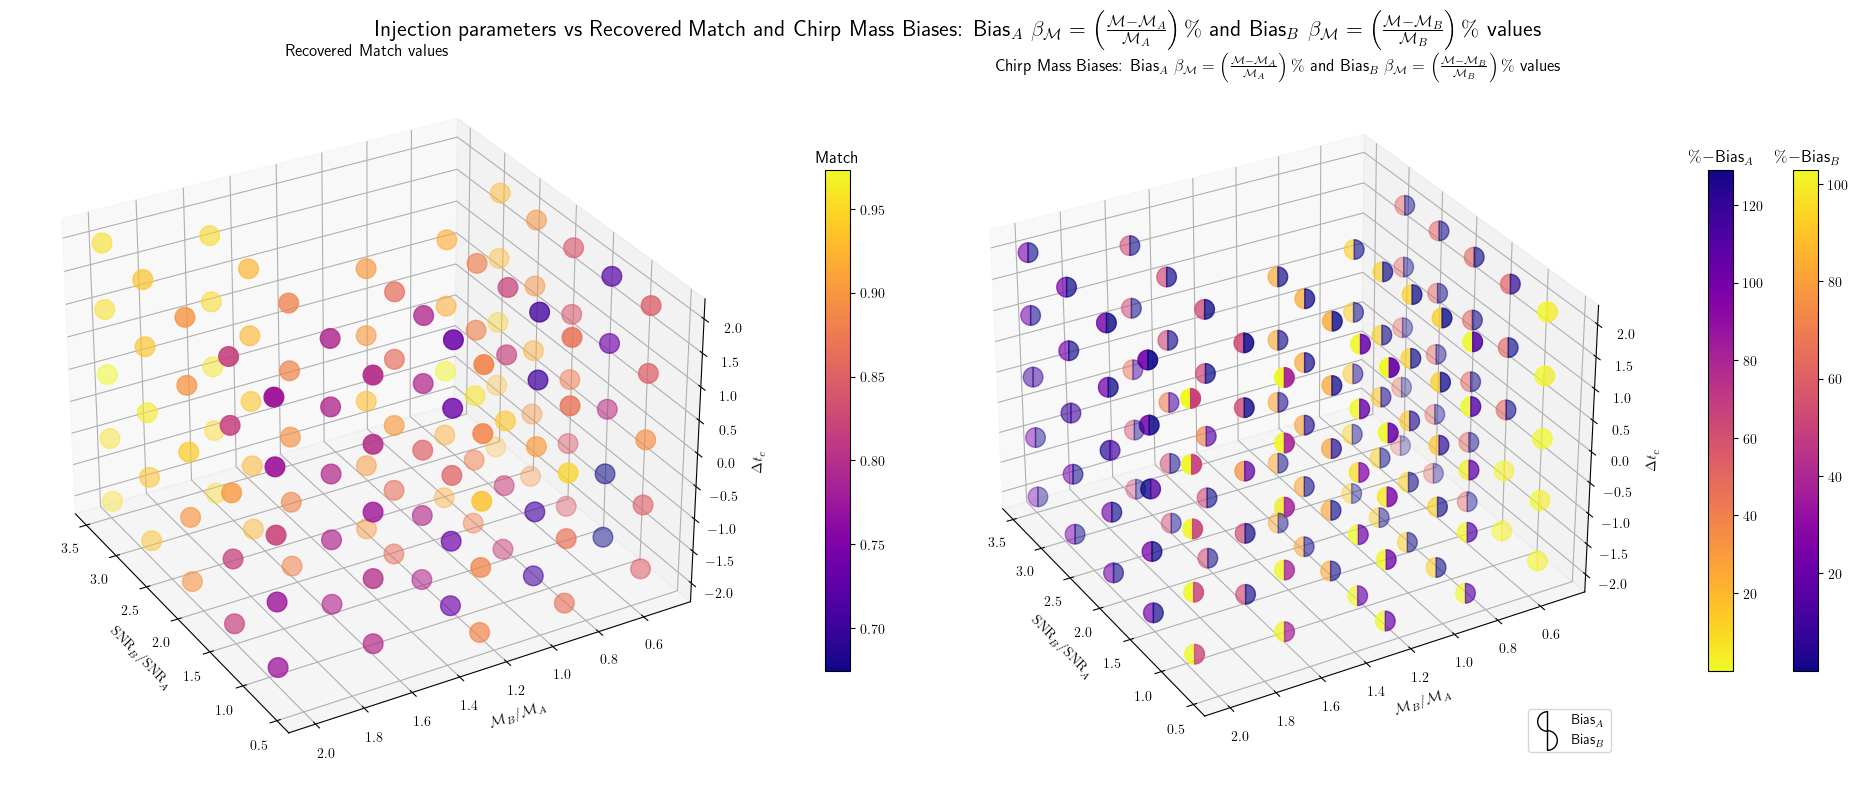

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8), subplot_kw={'projection': '3d'})

scatter1 = axes[0].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=match_f_snr, edgecolor=None, cmap='plasma', s=200)
clb1 = fig.colorbar(scatter1, ax=axes[0], shrink=0.7, pad=0.1)
clb1.ax.set_title('Match')

axes[0].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[0].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[0].set_zlabel('$\Delta t_c$')
axes[0].ticklabel_format(useOffset=False, style='plain')
axes[0].azim = 150
axes[0].set_title('Recovered Match values', loc='center')

ax1 = axes[1].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=bias_mchirp, cmap='plasma_r', s=200, marker=MarkerStyle("o", fillstyle="left"))
ax2 = axes[1].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=bias_mchirp_b, cmap='plasma', s=200, marker=MarkerStyle("o", fillstyle="right"))

clb2 = plt.colorbar(ax2, ax=axes[1], shrink=0.7, norm=None, pad=-0.05)
clb2.ax.set_title('$\\%-$Bias$_B$')

clb1 = plt.colorbar(ax1, ax=axes[1], shrink=0.7, norm=None, pad=0.1)
clb1.ax.set_title('$\\%-$Bias$_A$')

key_handles = [
    ax.scatter([], [], [], c='white', edgecolor='black', marker=MarkerStyle("o", fillstyle="left"), s=200),
    ax.scatter([], [], [], c='white', edgecolor='black', marker=MarkerStyle("o", fillstyle="right"), s=200)
]
key_labels = ['Bias$_A$', 'Bias$_B$']
axes[1].legend(key_handles, key_labels, loc='lower right')

axes[1].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[1].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[1].set_zlabel('$\Delta t_c$')
axes[1].ticklabel_format(useOffset=False, style='plain')
axes[1].azim = 150
axes[1].set_title('Chirp Mass Biases: Bias$_A$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_A}{\\mathcal{M}_A}\\right)\\%$ and Bias$_B$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_B}{\\mathcal{M}_B}\\right)\\%$ values', loc='center')

fig.suptitle('Injection parameters vs Recovered Match and Chirp Mass Biases: Bias$_A$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_A}{\\mathcal{M}_A}\\right)\\%$ and Bias$_B$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_B}{\\mathcal{M}_B}\\right)\\%$ values', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../../output/match_variations/match_mchirp_time_snr/BIASES_MCHIRP(3D).png')
plt.show()

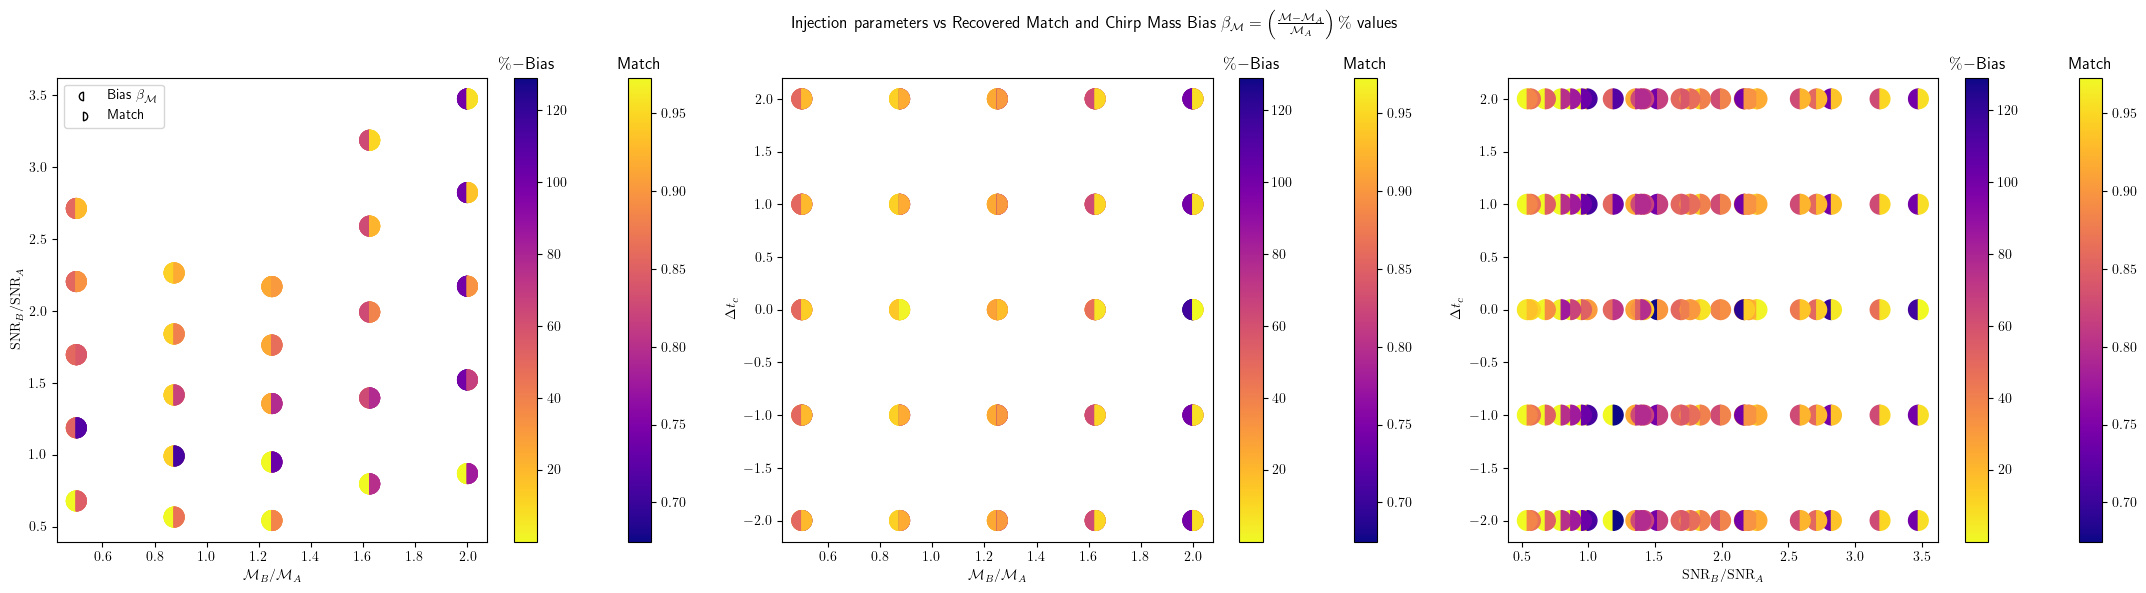

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(22, 6))

scatter11 = axes[0].scatter(mchirp_b/mchirp_a, snr_b/snr_a, c=bias_mchirp, cmap='plasma_r', marker=MarkerStyle("o", fillstyle="left"), s=200)
scatter12 = axes[0].scatter(mchirp_b/mchirp_a, snr_b/snr_a, c=match_f_snr, cmap='plasma', marker=MarkerStyle("o", fillstyle="right"), s=200)
axes[0].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[0].set_ylabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')

scatter21 = axes[1].scatter(mchirp_b/mchirp_a, delta_tc, c=bias_mchirp, cmap='plasma_r', marker=MarkerStyle("o", fillstyle="left"), s=200)
scatter22 = axes[1].scatter(mchirp_b/mchirp_a, delta_tc, c=match_f_snr, cmap='plasma', marker=MarkerStyle("o", fillstyle="right"), s=200)
axes[1].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[1].set_ylabel('$\Delta t_c$')

scatter31 = axes[2].scatter(snr_b/snr_a, delta_tc, c=bias_mchirp, cmap='plasma_r', marker=MarkerStyle("o", fillstyle="left"), s=200)
scatter32 = axes[2].scatter(snr_b/snr_a, delta_tc, c=match_f_snr, cmap='plasma', marker=MarkerStyle("o", fillstyle="right"), s=200)
axes[2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[2].set_ylabel('$\Delta t_c$')

clb2 = plt.colorbar(scatter12, ax=axes[0])
clb2.ax.set_title('Match')
clb1 = plt.colorbar(scatter11, ax=axes[0])
clb1.ax.set_title('$\\%-$Bias')
clb4 = plt.colorbar(scatter22, ax=axes[1])
clb4.ax.set_title('Match')
clb3 = plt.colorbar(scatter21, ax=axes[1])
clb3.ax.set_title('$\\%-$Bias')
clb6 = plt.colorbar(scatter32, ax=axes[2])
clb6.ax.set_title('Match')
clb5 = plt.colorbar(scatter31, ax=axes[2])
clb5.ax.set_title('$\\%-$Bias')

fig.suptitle('Injection parameters vs Recovered Match and Chirp Mass Bias $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_A}{\\mathcal{M}_A}\\right)\\%$ values', fontsize=12, fontweight='bold')

key_handles = [
    axes[0].scatter([], [], c='white', edgecolor='black', marker=MarkerStyle("o", fillstyle="left")),
    axes[0].scatter([], [], c='white', edgecolor='black', marker=MarkerStyle("o", fillstyle="right"))
]
key_labels = ['Bias $\\beta_{\\mathcal{M}}$', 'Match']
axes[0].legend(key_handles, key_labels, loc='upper left')

plt.tight_layout()
plt.show()